In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

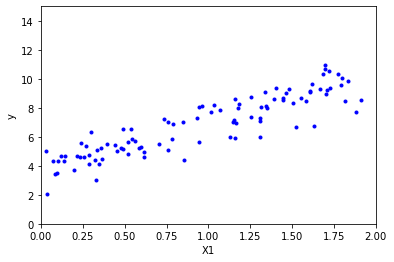

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('X1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.show()

#### Normal Equation : 
- Equation : $\theta_o = (X_b^T.X_b)^{-1}.X_b^T.y$
- Where, ```theta_o``` is the optimal value that minimizes the cost function
- and ```y``` is the vector of target values from y(1) to y(m)
- We use NumPy's Linear Algebra module to compute the inverse and dot products

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.77951434],
       [3.19959065]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [7]:
y_predict

array([[ 3.77951434],
       [10.17869564]])

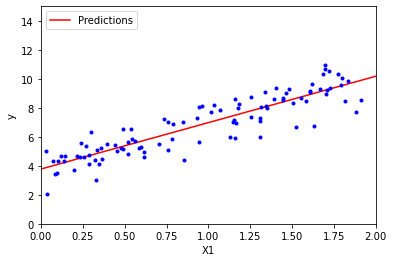

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.axis([0, 2, 0, 15])
plt.show()

#### Using Scikit-Learn :
- Can be imported as LinearRegression()
- Can be called directly using scipy.linalg.lstsq()
- Where ```lstsq``` stands for least squares
- $\theta_o = X^+.y$, where $X^+$ is the pseudoinverse of X
- Pseudoinverse or Moore-Penrose can be found using : ```np.linalg```

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.77951434]), array([[3.19959065]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.77951434],
       [10.17869564]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.77951434],
       [3.19959065]])

#### Pseudoinverse :
- Calculated using SVD (Singular Value Decomposition)
- Computational complexity is about $O(n^2)$
- Formula : $X^+ = V\epsilon^+U^T$ where $V$, $\epsilon$, $U$ are matrices
- Unlike Normal equation, works when matrices are not invertible

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.77951434],
       [3.19959065]])

### Batch Gradient Descent :

- Uses whole batch of training data at every step
- Very slow on large sets but provides optimal cost function
- Scales better when the number of features is high

#### Gradient Vector of Cost function :
- Equation : $\triangledown_\theta MSE(\theta) = (2/m).X^T.(X\theta - y)$
- Gradient Descent Step : $\theta_f = \theta_i - \eta.\triangledown_\theta MSE(\theta)$
- $\eta$ : Learning rate used to determine size of the downhill step
- $\eta$ too low : Algorithm will reach solution but will take lot of time
- $\eta$ too high : Algorithm diverges away from solution at each jump

In [13]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[3.77951434],
       [3.19959065]])

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X1')
    plt.axis([0, 2, 0, 15])
    plt.title("eta = {}".format(eta))

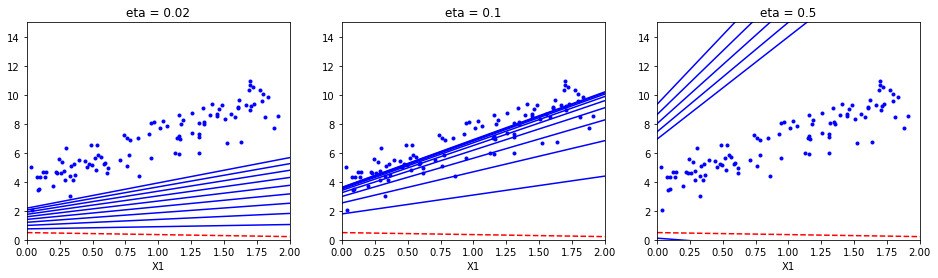

In [16]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(16, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### Stochastic Gradient Descent :

- Picks random instance from the training set at each step
- And computes the gradients based only on that single instance
- Algorithm is fast and good with huge training sets unlike Batch GD
- But is less regular, continues to jump around optimal solutions
- Hence when stopped, it provides good but not optimal results
- Its irregular nature makes it suitable when the cost function is irregular
- Has a better chance of escaping local minima and reaching the global minima

In [17]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

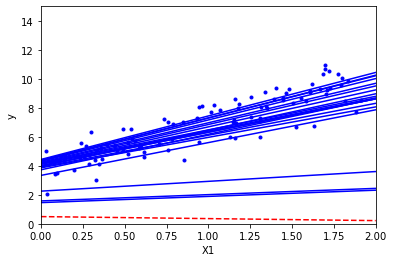

In [18]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.show()

In [19]:
theta

array([[3.77671871],
       [3.16444781]])

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.74426018]), array([3.15908508]))

### Mini Batch Gradient Descent :

- Computes gradients on small random serts of instances (mini-batches)
- Gets closer to global minima but finds it hard to escape local minima

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[3.84126424],
       [3.28102988]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

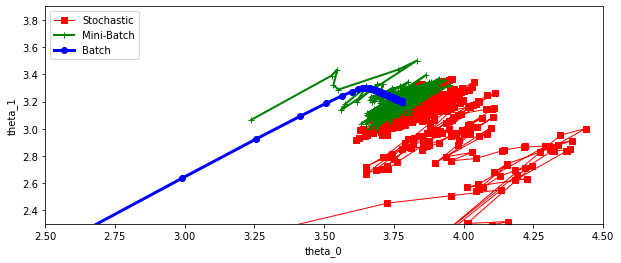

In [25]:
plt.figure(figsize=(10, 4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label='Mini-Batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label='Batch')

plt.legend(loc="upper left")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

#### Comparisons :
|Algorithm|Many-instances|Many-features|Scaling-required|Scikit-learn|Out-of-core-support|Hyperparams|
|:---|:---|:---|:---|:---|:---|:---|
|Normal Equation|Fast|Slow|No|N/A|No|0|
|SVD|Fast|Slow|No|LinearRegression|No|0|
|Batch GD|Slow|Fast|Yes|SGDRegressor|No|2|
|Stochastic GD|Fast|Fast|Yes|SGDRegressor|Yes|>=2|
|Mini-Batch GD|Fast|Fast|Yes|SGDRegressor|Yes|>=2|

### Polynomial Regression :

- Used in the case of non-linear dataset
- Capable of finding relationship between features
- We use Scikit-Learn's PolynomialFeatures class to transform data
- Adds the second degree polynomial of each feature in the training data

In [26]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

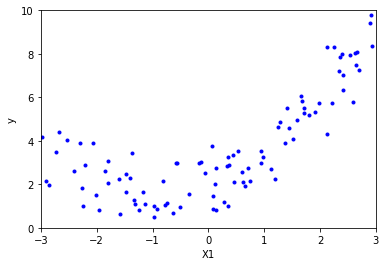

In [27]:
plt.plot(X, y, 'b.')
plt.xlabel('X1')
plt.ylabel('y')
plt.axis([-3, 3, 0, 10])
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [29]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

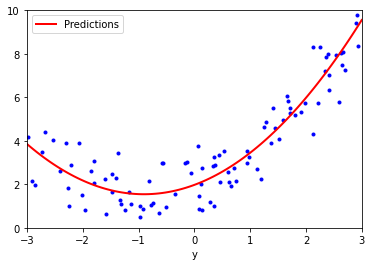

In [31]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('X1')
plt.xlabel('y')
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curves :

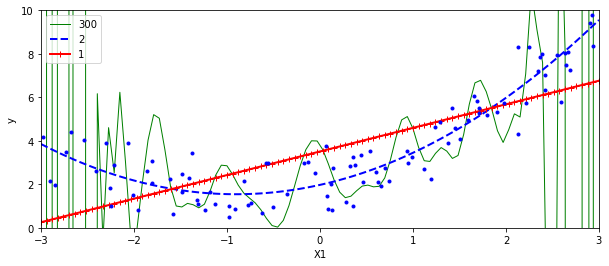

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(10, 4))

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X1')
plt.ylabel('y')
plt.axis([-3, 3, 0, 10])
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')

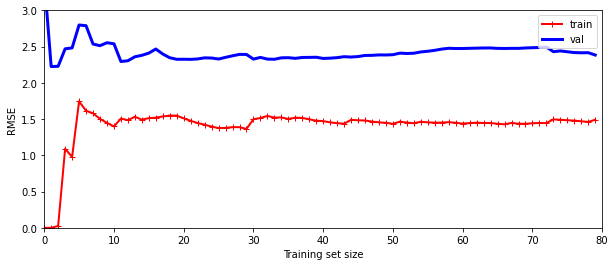

In [34]:
lin_reg = LinearRegression()
plt.figure(figsize=(10, 4))
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

- Error on the Training data goes up until it reaches a plateau
- At that point, adding new instances does not make the average better or worse
- For validation, starts with high error as its initially incapable of generalizing
- Then as more instances are shown, it learns and error goes down and ends as a plateau

### Ridge Regression :

- Forces algorithm to fit data and keep the model weights small
- Hyperparamter $\alpha$ controls how much regularization is needed
- If $\alpha = 0$, Ridge Regression is just Linear Regression
- If $\alpha$ is large, then all weights end up being zero resulting in flat line through data's mean
- It is important to scale the data before Ridge Regression as its sensitive to scale of input features

#### Formulae :
- Uses L2 Norm : $||x||_2 = \sqrt{x_1^2+x_2^2+x_3^2+...+x_i^2}$
- Regularization term : $\alpha\displaystyle\sum_{i=1}^n(\theta_i)^2$ added to the cost function

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

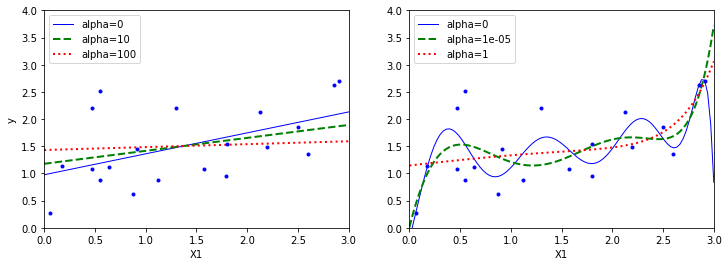

In [36]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label='alpha={}'.format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X1')
    plt.axis([0, 3, 0, 4])
        
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel('y')
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [37]:
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [38]:
ridge_reg = Ridge(alpha=1, solver='sag', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [39]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### Lasso Regression :

- Least Absolute Shrinkage and Selection Operator (Lasso) Regression
- Completely eliminates weights of least important features (setting them to zero)
- It automatically performs feature selection and outputs a sparse model

#### Formulae :
- Uses L1 Norm : $||x||_1 = |x_1| + |x_2| + |x_3| + ... + |x_i|$
- Regularization term : $\displaystyle\alpha\sum_{i=1}^n|\theta_i|$ added to the cost function

C:\Users\pm_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827439, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


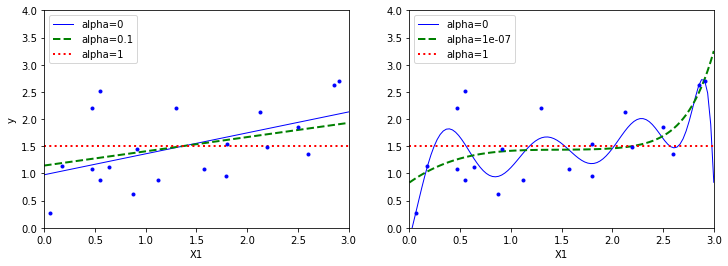

In [40]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel('y')
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [41]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net :

- Mix between Ridge and Lasso Regression
- Ratio of the mix between them (r) can be controlled
    - If r = 0 : Ridge Regression
    - If r = 1 : Lasso Regression

Cost Function : $J(\theta) = MSE(\theta) + r.\displaystyle\alpha.\sum_{i=1}^n|\theta_i| + (1-r)/2.\alpha.\sum_{i=1}^n\theta_i^2$

In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping :

- Way to regularize iterative learning algorithms such as GD
- Stopping the training as soon as validation error reaches its minimum
- This way we train the model just enough to produce less error and not overfit the data

In [43]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [44]:
from copy import deepcopy

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005, random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

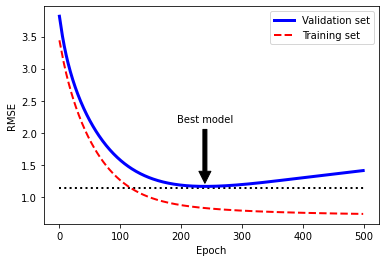

In [45]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model', xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

best_val_rmse -= 0.03

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")

plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

### Estimating Probabilities :

- Logistic Regression computes weighted sum of inputs
- But outputs the logistic of the result (class-wise probability)
- Prediction :
    - $y = 0 if p < 0.5$
    - $y = 1 if p \geq 0.5$
- Logistic Regression : $p = h_\theta(x) = \sigma(x^T.\theta)$
- Sigmoid Function : $\sigma(t) = 1\div1 + exp(-t)$

### Training and Cost Function :

- We set $\theta$ such that, 
    - positive instances (y = 1) have high probabilities
    - and negative instances (y = 0) have low probabilities
- Cost function of single training instance :
    - $c(\theta) = -log(p),  if (y = 1)$
    - $c(\theta) = -log(1 - p),  if (y = 0)$
- Cost is large when model estimates probability close to 0 for positive instance
- Cost is small when model estimates probability close to 0 for negative instance
- CF for all instances : $J(\theta) = -1/m.\sum_{i=1}^m[y^{(i)}.log(p^{(i)}) + (1 - y^{(i)}).log(1 - p^{(i)})]$

### Decision Boundaries :

- Region where probabilities of both classes are at 50%
- Used as a reference to decide which side of the boundary is which class
- Logistic Regression can be regularized using L1 and L2 penalties (L2 default)

In [46]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [47]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [48]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

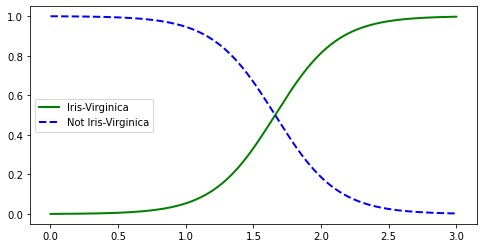

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 4))
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Iris-Virginica')
plt.legend(loc='center left')
plt.show()

In [51]:
decision_boundary

array([1.66066066])

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression :

- Given an instance 'x', the softmax model computes scores for each class 'k'
- Then it estimates the probability of each class using the softmax function
- Each class has its own dedicated parameter vector 'theta'
- Softmax score for class 'k' : $s_k(x) = x^T.\theta^{(k)}$
- Softmax function : $p_k = \sigma(s(x))_k = exp(s_k(x)) \div \sum_{j=1}^Kexp(s_j(x))$
- Softmax Classifier prediction : $y = argmax_k\sigma(s(x))_k = argmax_ks_k(x) = argmax_k((\theta^{(k)})^T.x)$
- The argmax operator returns the value of k that maximizes the probability
- When training, we use cross-entropy to penalize the model when it estimates a low probability for a target class.

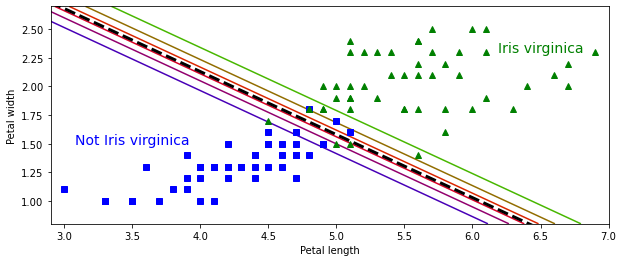

In [53]:
from sklearn.linear_model import LogisticRegression

X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.int)

log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 500).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [54]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

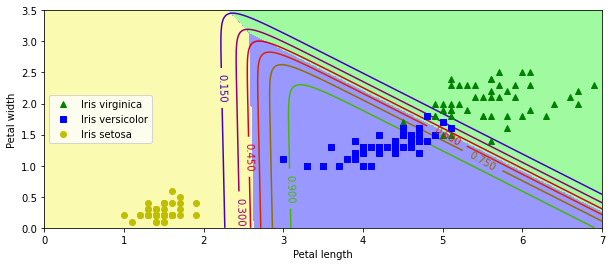

In [55]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0, 7, 0, 3.5])
plt.show()

In [56]:
softmax_reg.predict([[5, 2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])